**Customer Churn**

**Import Library**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path






**Exploratory Data Analysis (EDA)**

In [ ]:
#Loading data

df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [ ]:
#Ukuran dataset
print(df.shape)

(7043, 21)


In [ ]:
#5 data teratas
print(df.head)

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Nama Kolom
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


 **Visualisasi Data**

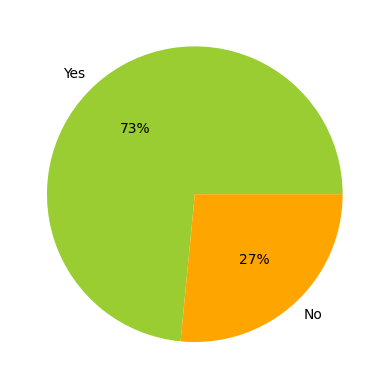

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax =plt.subplots()

_ = ax.pie(x = df.Churn.value_counts(), 
           labels=['Yes','No'], 
           colors=['yellowgreen', 'orange'],autopct='%.0f%%')


plt.show()

In [ ]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

**Manipulasi Data**

In [ ]:
# Melihat Missing Value

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#harusnya TotalCharges bertype numerik
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#Menghapus Missing Value
df.dropna(how = 'any', inplace = True)

#df.fillna(0)

In [ ]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# statistika deskriptif variabel numerik
numerik = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerik].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
#drop column customerID 
df.drop(columns= ['customerID'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Label encoding Churn supaya bisa menggunakan sns.barplot

le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

**Data Exploration Variabel Kategorik**

In [ ]:
demo_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

serv_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

cat_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod']

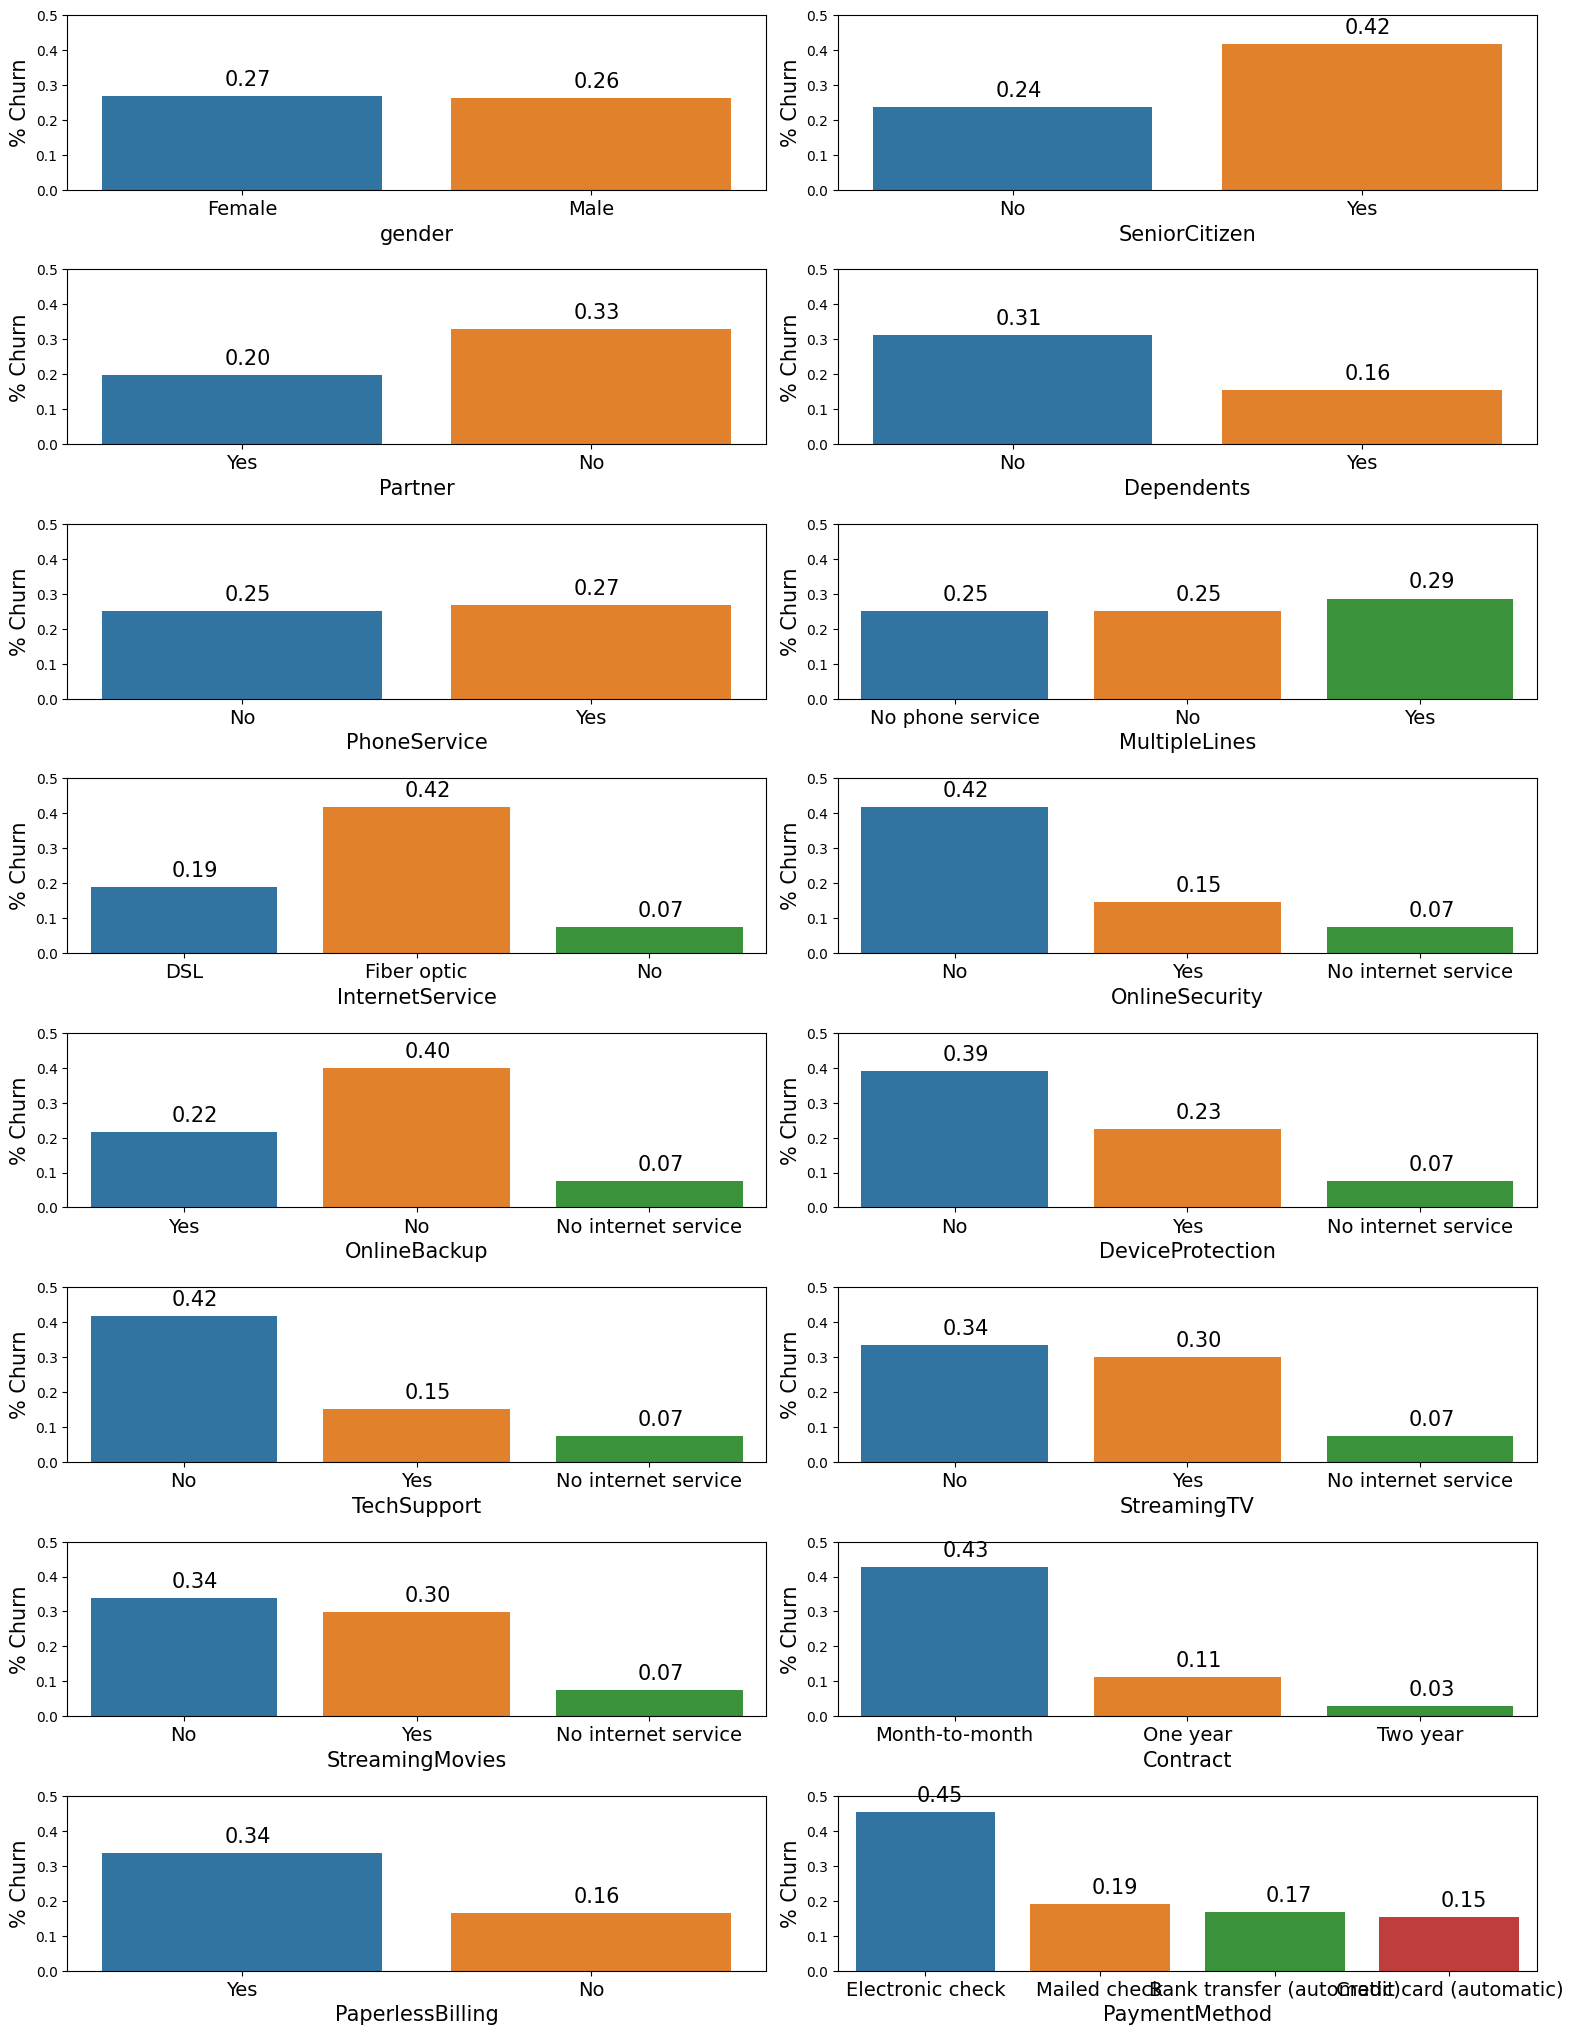

In [ ]:

plt.figure(figsize=(16,25))

for i,col in enumerate(features):    
    plt.subplot(10,2,i + 1)
    
    ax = sns.barplot(x = col, y = "Churn", data = df,  ci = None)

    plt.xlabel(col, fontsize= 15)
    plt.ylabel("% Churn", fontsize= 15)
    plt.ylim(0,0.5)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=15)

plt.tight_layout()

plt.show()




dari visualisasi untuk variabel kategorik diatas dapat disimpulkan bahwa:

*  **Gender** : baik untuk laki-laki maupun perempuan hampir tidak ada perbedaan persentase churn
*  **SeniorCitizen**: memiliki persentase Churn  42% mengindikasikan tingginya churn
*   **Partner**: pelanggan yang tidak memiliki partner cenderung memiliki persentase churn yang cukup tinggi dibandingkan pelanggan yang memiliki partner
*   **Dependents**: Pelanggan yang tidak memiliki tanggungan cenderung memiliki persentase churn yang cukup tinggi dibandingkan pelanggan yang memiliki tanggungan
*   **PhoneService**: memiliki perbedaan yang cukup tipis dalam persentase churn antara pelanggan dengan atau tanpa Phone Service.
*   **InternetService**: pelanggan yang menggunakan DSL dalam layanan internet memiliki persentase yang kecil untuk churn
- **Streaming TV dan Movies**: Baik pengguna maupun tidak, perbedaan pelanggan yang churn hanya sedikit.
- **Paperless Billing**: Pelanggan yang menggunakan paperless billing lebih banyak yang churn daripada yang tidak
- **PaymentMethode** :  pelanggan yang enggunakan electronic check (bagian dari paperles billing) sebagai metode pembayaran memiliki churn yang tinggi dibanding metode pembayaran lainnya
- **Online Security, Online Backup, Device Protection, Tech Support**: Pelanggan yang menggunakan layanan-layanan tersebut cenderung tidak memiliki churn yang tinggi
- **Contract**: Pelanggan yang membayar bulanan memiliki churn yang paling tinggi






In [ ]:
df.groupby(by=['InternetService'])['MonthlyCharges'].mean().sort_values()

InternetService
No             21.076283
DSL            58.088017
Fiber optic    91.500129
Name: MonthlyCharges, dtype: float64

terlihat bahwa harga fiber optic paling mahal dan internet service fiber optic memiliki churn paling tinggi.

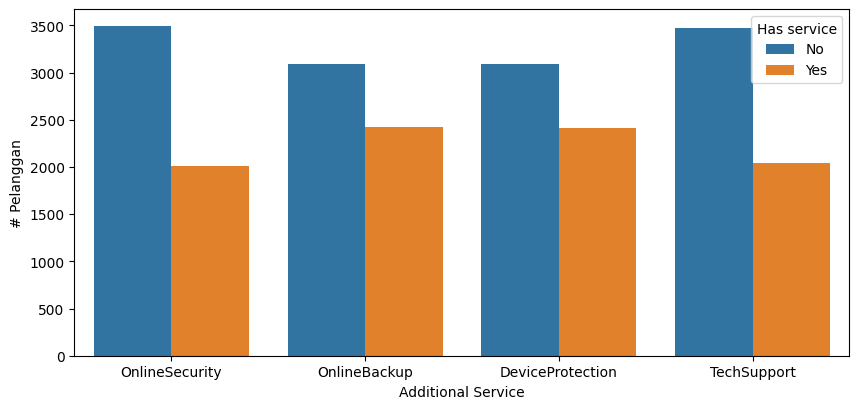

In [ ]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"]
df_1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df_1, x='variable', hue='Has service')
ax.set(xlabel='Additional Service', ylabel='# Pelanggan')
plt.show()

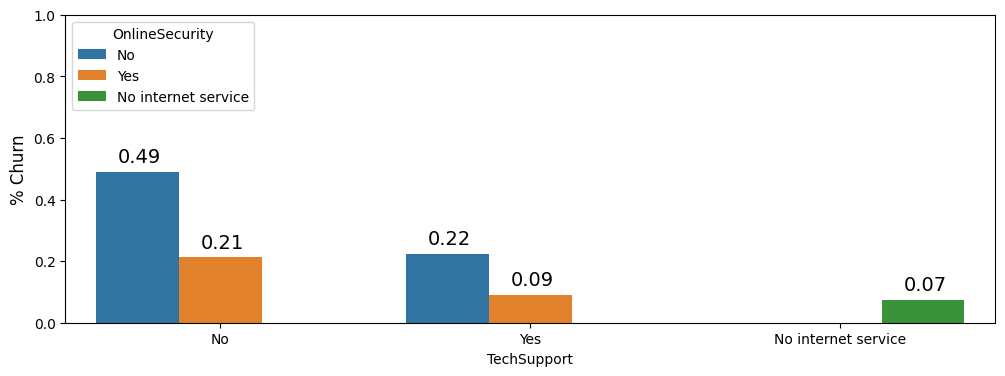

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "TechSupport", y = "Churn",hue = "OnlineSecurity", data = df, ci = None)

plt.ylabel("% Churn", fontsize= 12)
plt.ylim(0,1.0)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.070, p.get_height()+0.03),fontsize=14)

plt.show()

Kelompok Pelanggan yang tidak menggunakan kedua layanan tersebut memiliki kecenderungan untuk churn yang besar yaitu 49%, sedangkan yang menggunakan kedua layanan tersebut memiliki churn yang kecil yaitu 9%.



sekarang kita lihat kemungkinan adanya hubungan antara fitur Partner dan Dependents. dimana pada umumnya pelanggan yang memiliki tanggungan (anak) adalah mereka yang sudah menikah.

In [ ]:
df.groupby(['Partner'])['Dependents'].value_counts()

Partner  Dependents
No       No            3280
         Yes            359
Yes      Yes           1740
         No            1653
Name: Dependents, dtype: int64

In [ ]:
df.groupby(by=['Partner', 'Dependents'])['Churn'].value_counts(normalize = True)

Partner  Dependents  Churn
No       No          0        0.657622
                     1        0.342378
         Yes         0        0.785515
                     1        0.214485
Yes      No          0        0.745917
                     1        0.254083
         Yes         0        0.856897
                     1        0.143103
Name: Churn, dtype: float64

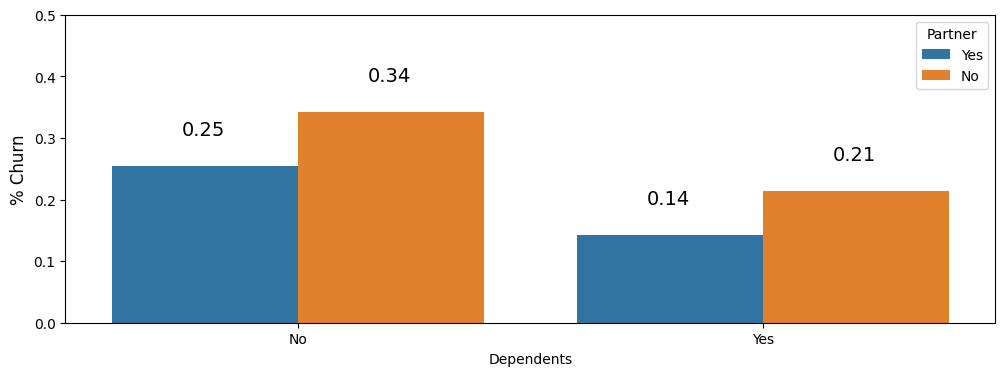

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "Dependents", y = "Churn", hue = "Partner", data = df,ci = None)

plt.ylabel("% Churn", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.15, p.get_height()+0.05),fontsize=14)

plt.show()

Kelompok pelanggan yang tidak memiliki pasangan serta tidak memiliki tanggungan memiliki persentase churn paling tinggi yaitu 34%, diikuti kelompok pelanggan yang memiliki pasangan namun tidak memiliki tanggungan sebesar 25%.

In [ ]:
df.groupby(by=['SeniorCitizen', 'Dependents'])['Churn'].value_counts(normalize = True)

SeniorCitizen  Dependents  Churn
No             No          0        0.719474
                           1        0.280526
               Yes         0        0.848606
                           1        0.151394
Yes            No          0        0.568030
                           1        0.431970
               Yes         0        0.758242
                           1        0.241758
Name: Churn, dtype: float64

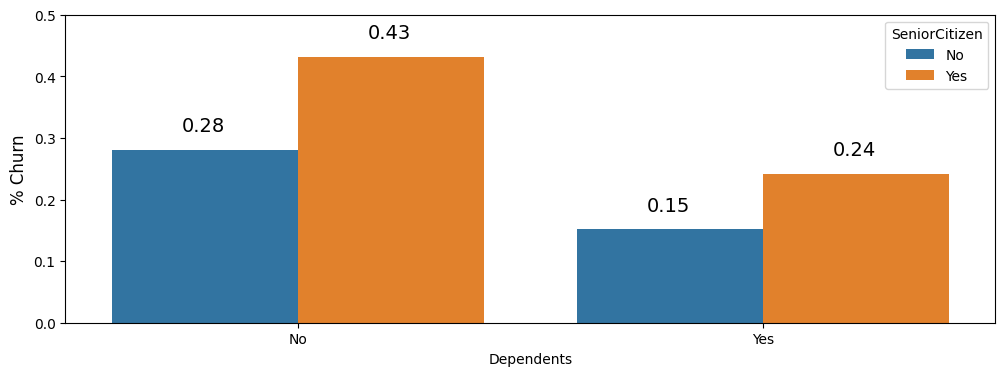

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "Dependents", y = "Churn", hue = "SeniorCitizen", data =df, ci = None)

plt.ylabel("% Churn", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.15, p.get_height()+0.03),fontsize=14)

plt.show()

In [ ]:
df['SeniorCitizen'].value_counts()

No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64

In [ ]:
df.groupby(by=['SeniorCitizen', 'Dependents'])['Churn'].value_counts()

SeniorCitizen  Dependents  Churn
No             No          0        2793
                           1        1089
               Yes         0        1704
                           1         304
Yes            No          0         597
                           1         454
               Yes         0          69
                           1          22
Name: Churn, dtype: int64

berdasarkan visualisasi diatas jumlah senior citizen  yang memiliki tanggungan sangat sedikit. Dari 1142 senior citizen, hanya 91 yang memiliki tanggungan. kecenderungan untuk churn dari senior citizen yang tidak memiliki tanggungan mencapai 43%.

#

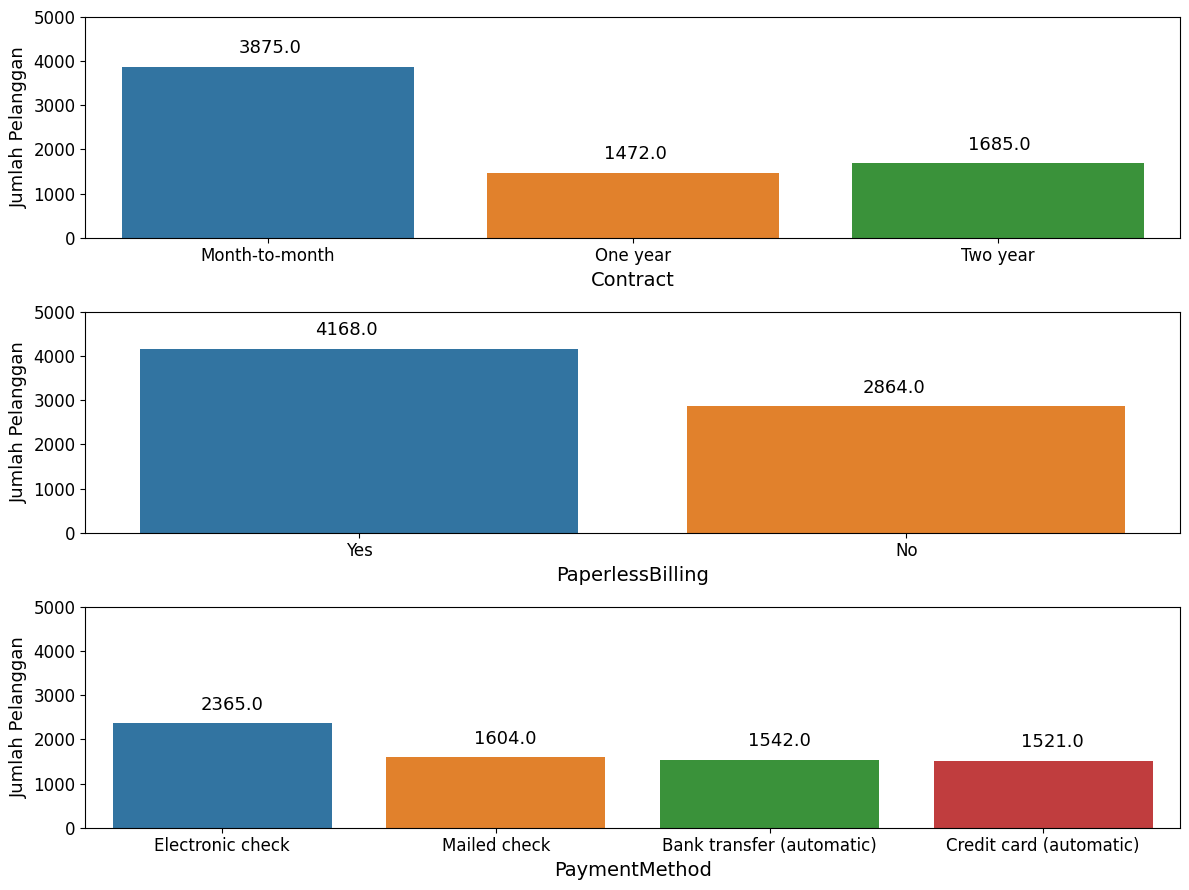

In [ ]:
plt.figure(figsize=(12,9))

for i,col in enumerate(cat_features):    
    plt.subplot(3,1,i + 1)
    
    ax = sns.countplot(data = df, x = col)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Jumlah Pelanggan", fontsize= 13)
    plt.ylim(0,5000)
    plt.xticks(fontsize= 12)
    plt.yticks(fontsize= 12)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+300), fontsize= 13)

plt.tight_layout()

plt.show()

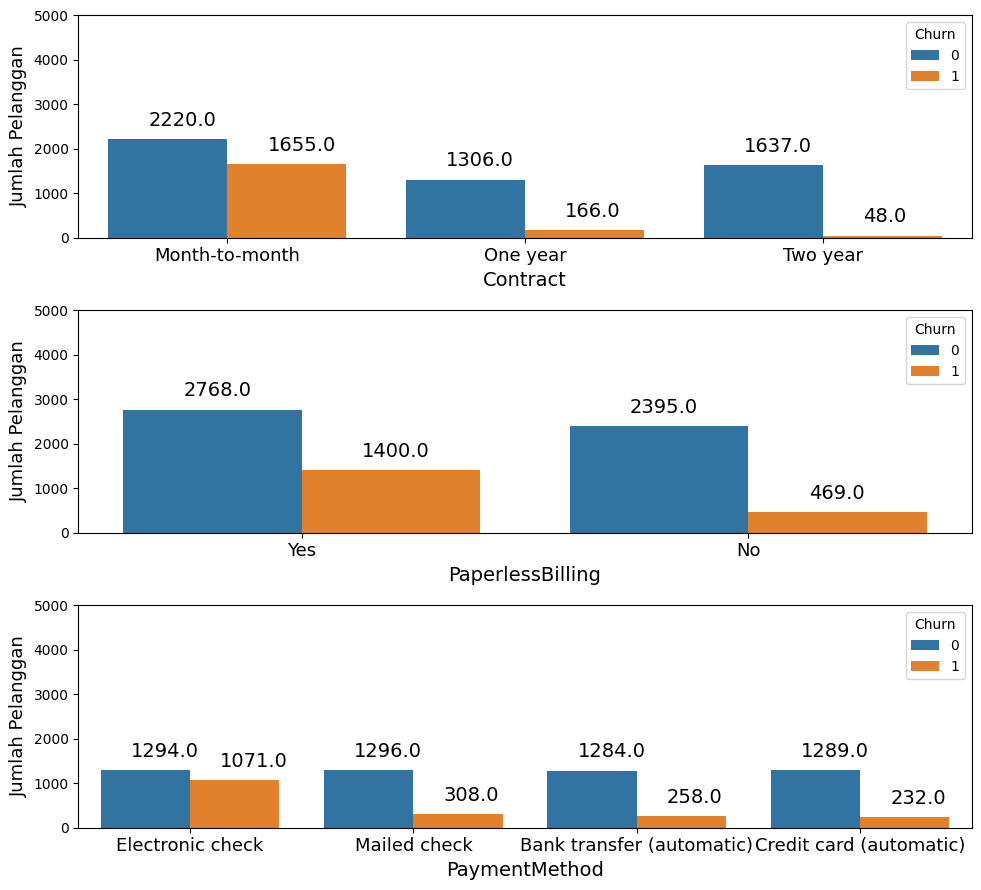

In [ ]:
plt.figure(figsize=(10,9))

for i,col in enumerate(cat_features):    
    plt.subplot(3,1,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="Churn")

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Jumlah Pelanggan", fontsize= 13)
    plt.ylim(0,5000)
    plt.xticks(fontsize= 13)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.135, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()


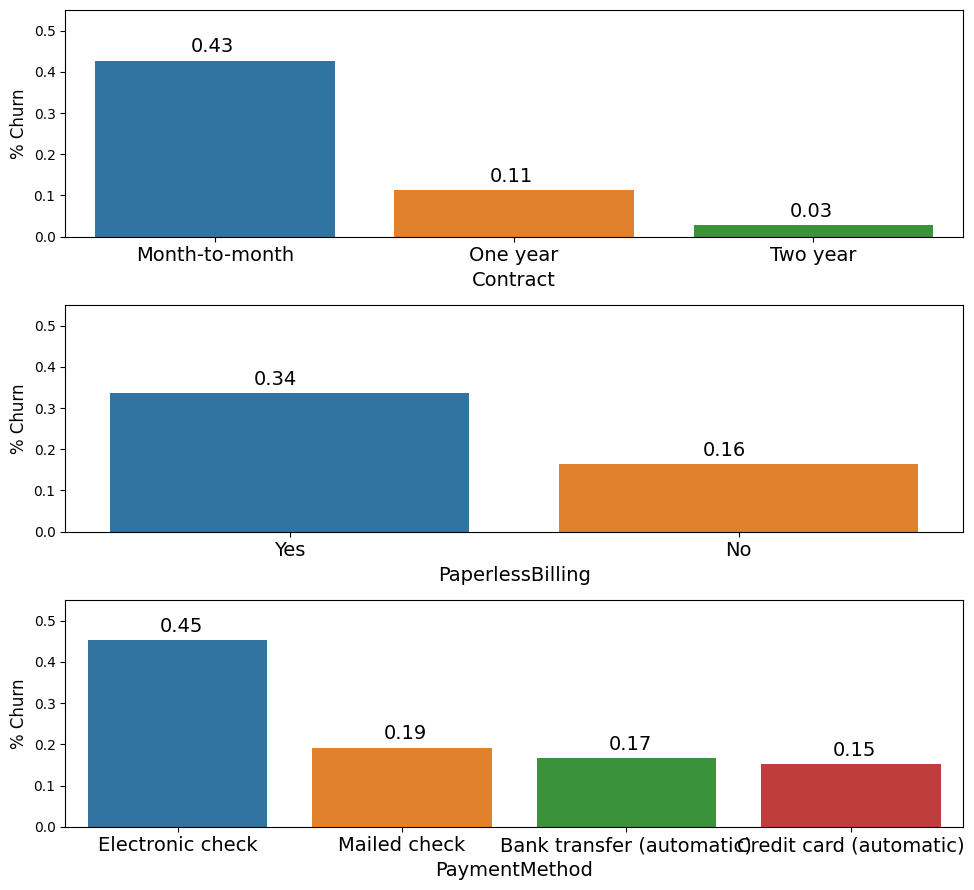

In [ ]:
plt.figure(figsize=(10,9))

for i,col in enumerate(cat_features):    
    plt.subplot(3,1,i + 1)
    
    ax = sns.barplot(x = col, y = "Churn", data = df,  ci = None)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("% Churn", fontsize= 12)
    plt.ylim(0,0.55)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.32, p.get_height()+0.02),fontsize=14)

plt.tight_layout()

plt.show()

dalam fitur contract kategori pembayaran perbulan memiliki jumlah pelanggan dan churn tertinggi.

Dalam Payment Method, dapat dilihat bahwa Electronic Check menjadi kategori yang paling banyak churn-nya. 

dan kelompok pelanggan yang menggunakan Paperlessbilling memiliki churn yang tinggi.

In [ ]:
df.groupby(by=['Contract','PaperlessBilling', 'PaymentMethod'])['Churn'].value_counts()


Contract        PaperlessBilling  PaymentMethod              Churn
Month-to-month  No                Bank transfer (automatic)  0        151
                                                             1         55
                                  Credit card (automatic)    0        116
                                                             1         45
                                  Electronic check           0        265
                                                             1        188
                                  Mailed check               0        351
                                                             1        118
                Yes               Bank transfer (automatic)  0        237
                                                             1        146
                                  Credit card (automatic)    0        249
                                                             1        133
                                  Electronic 

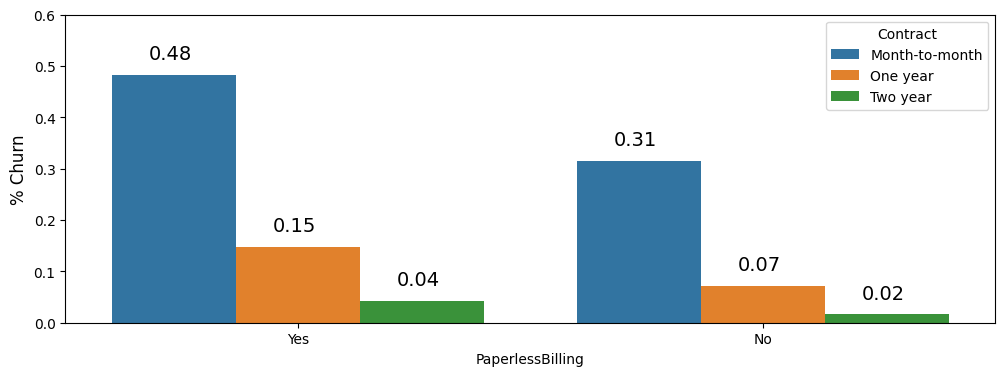

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "PaperlessBilling", y = "Churn", hue = "Contract", data = df, ci = None)

plt.ylabel("% Churn", fontsize= 12)
plt.ylim(0,0.6)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.08, p.get_height()+0.03),fontsize=14)

plt.show()

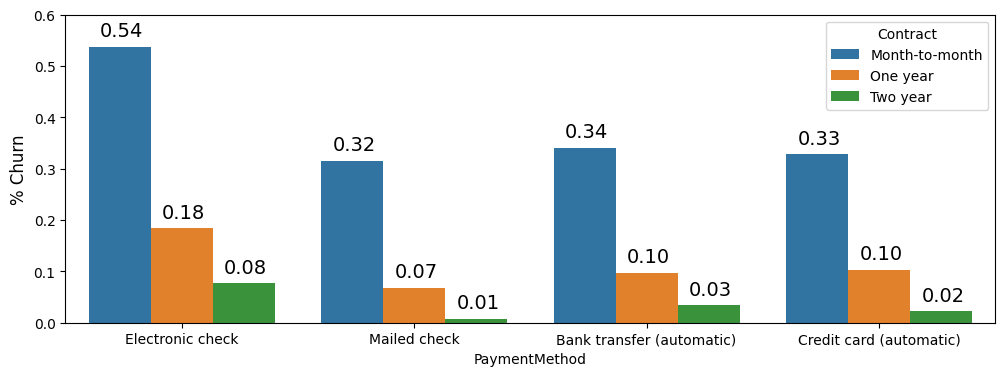

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "PaymentMethod", y = "Churn", hue = "Contract", data = df,  ci = None)

plt.ylabel("% Churn", fontsize= 12)
plt.ylim(0,0.6)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.05, p.get_height()+0.020),fontsize=14)

plt.show()

dapat dilihat dari visualisasi diatas bahwa persentase churn dari pelanggan yang melakukan pembayaran bulanan dan menggunakan paperless billing jenis electronic check memiliki persentase yang tinggi daripada yang lain.

In [ ]:

print(df.groupby(by=['Contract'])['MonthlyCharges'].mean().sort_values())


Contract
Two year          60.872374
One year          65.079416
Month-to-month    66.398490
Name: MonthlyCharges, dtype: float64


Terlihat  bahwa Durasi kontrak pembayaran dari pelanggan dengan kontrak bulanan sedikit lebih mahal daripada yang menggunakan kontrak tahunan.

**EDA Variabel Numerik**

In [ ]:

#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline



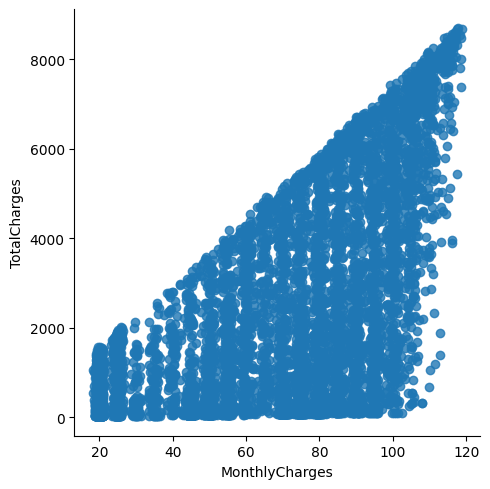

In [ ]:
sns.lmplot(data=df, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

TotalCharges meningkat seiring dengan peningkatan MonthlyCharges

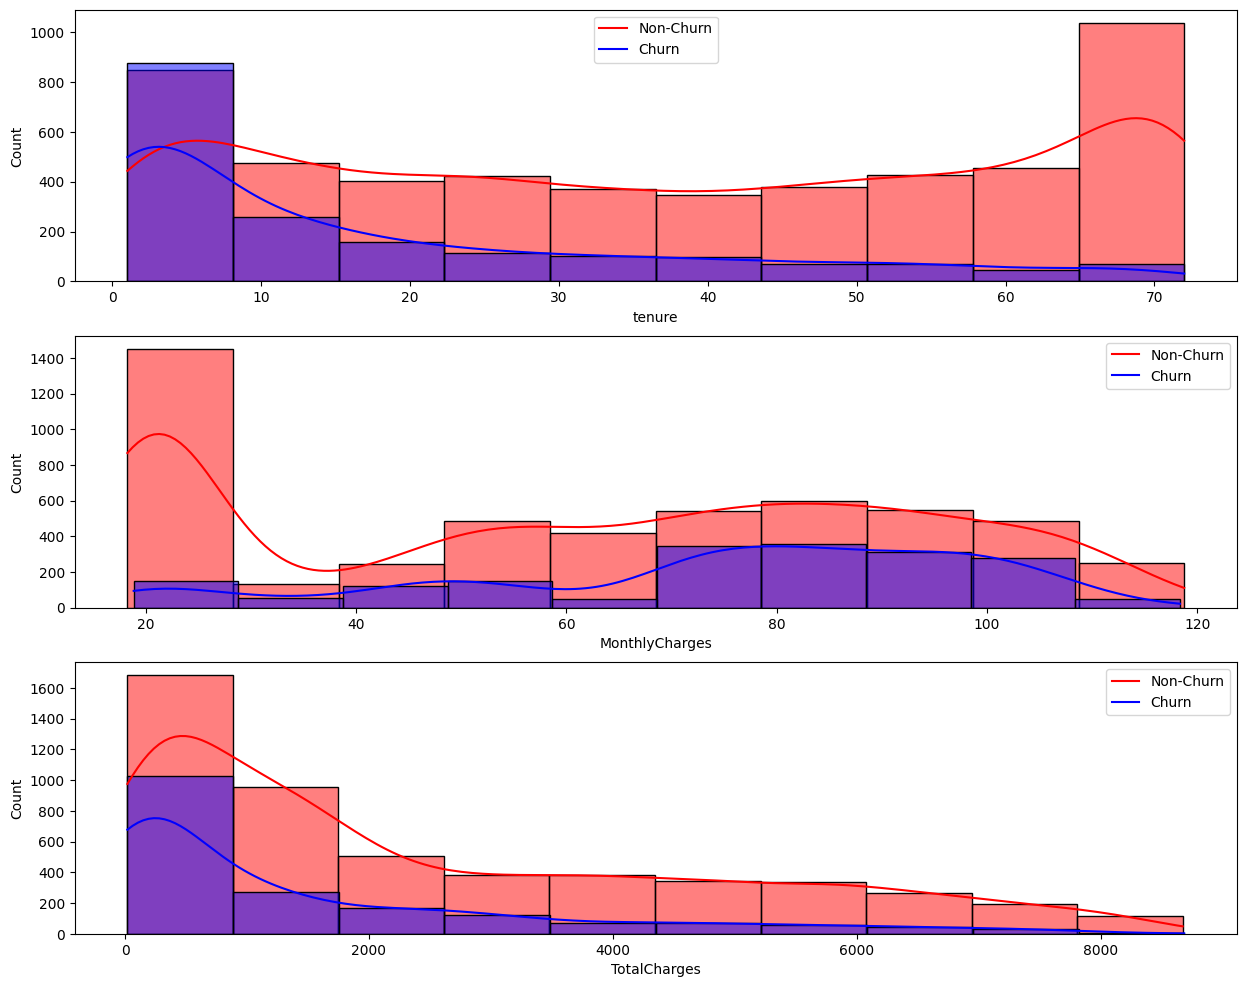

In [ ]:
plt.figure(figsize=(15,12))

for i,col in enumerate(num_features):    
    plt.subplot(3,1,i + 1)
    sns.histplot(df[df.Churn == 0][col],
                 bins=10,
                 color='red',
                 label='Non-Churn',
                 kde=True)
    sns.histplot(df[df.Churn == 1][col],
                 bins=10,
                 color='blue',
                 label='Churn',
                 kde=True)
    
    plt.legend(["Non-Churn","Churn"])

plt.show()



*  di bulan awal pada fitur **tenure** memiliki churn paling banyak (semakin cepat berlangganan customer, semakin besar kecenderungan churn)
*  Untuk **MonthlyCharges** ada kecenderungan semakin kecil nilai biaya bulanan yang dikenakan, semakin kecil juga kecenderungan untuk Churn
* Churn lebih tinggi terdapat di **TotalCharges** yang rendah







In [ ]:
df['tenure_bin'] = pd.cut(df['tenure'],[-1,12,24,36,48,60,100])
df['tenure_bin'].value_counts(sort = False)

(-1, 12]     2175
(12, 24]     1024
(24, 36]      832
(36, 48]      762
(48, 60]      832
(60, 100]    1407
Name: tenure_bin, dtype: int64

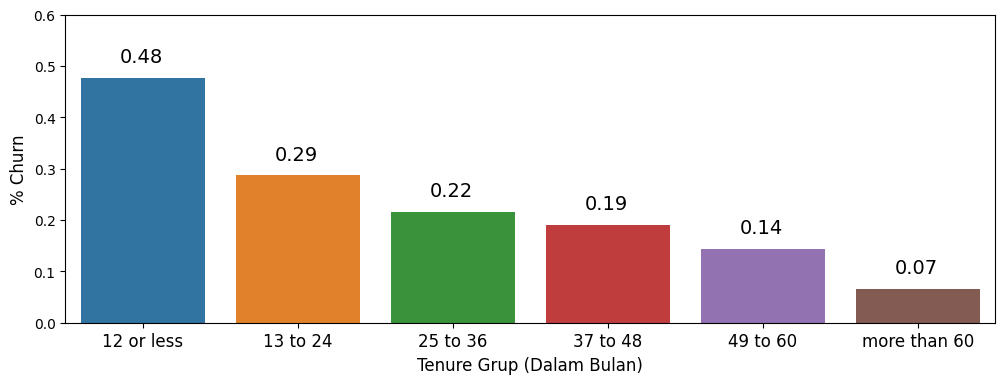

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "tenure_bin", y = "Churn", data = df, ci = None)

plt.ylabel("% Churn", fontsize= 12)
plt.ylim(0,0.6)
plt.xticks([0,1,2,3,4,5], ['12 or less', '13 to 24', '25 to 36', '37 to 48', '49 to 60', 'more than 60'], fontsize = 12)
plt.xlabel("Tenure Grup (Dalam Bulan)", fontsize= 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=14)

plt.show()

dari visualisasi diatas didapatkan 48% pelanggan yang churn saat pelanggan berlangganan kurang dari 12 bulan

**Kesimpulan EDA**

- Gender: baik untuk laki-laki maupun perempuan hampir tidak ada perbedaan persentase churn.
- SeniorCitizen: Persentase churn dalam kelompok senior citizen adalah 42%, mengindikasikan adanya churn yang tinggi di kelompok tersebut.
- terlihat bahwa harga fiber optic paling mahal dan **internet service** fiber optic memiliki persentase churn paling tinggi.
- Kelompok Pelanggan yang tidak menggunakan  layanan TechSupport & OnlineSecurity  memiliki kecenderungan untuk churn yang besar yaitu 49%
- Partner & Dependents : persentase churn memiliki kecenderungan cukup tinggi untuk orang-orang yang tidak memiliki partner (partner: No) dan tidak memiliki tanggungan 
- Kecenderungan untuk churn dari senior citizen yang tidak memiliki tanggungan mencapai 43%.
- Dalam fitur contract kategori pembayaran perbulan memiliki jumlah pelanggan dan persentase churn tertinggi.
- Dalam Payment Method, dapat dilihat bahwa Electronic Check menjadi kategori yang paling banyak churn-nya.
- Kelompok pelanggan yang menggunakan Paperlessbilling memiliki churn yang tinggi.
-Persentase churn dari pelanggan yang melakukan pembayaran bulanan dan menggunakan paperless billing jenis electronic check memiliki persentase yang tinggi daripada yang lain.
- Di bulan awal pada fitur tenure memiliki persentase churn paling banyak
- Untuk MonthlyCharges ada kecenderungan semakin kecil nilai biaya bulanan yang dikenakan, semakin kecil juga kecenderungan untuk Churn
- Churn lebih tinggi terdapat di TotalCharges yang rendah
- 48% pelanggan yang churn saat pelanggan berlangganan kurang dari 12 bulan
- Rata rata biaya bulanan untuk pelanggan yang churn lebih rendah daripada yang tidak, karena hanya bayar beberapa bulan saja.


**Business Insight**

- Perusahaan perlu memperhatikan senior citizen karena memiliki kecenderungan churn yang tinggi
- Perusahaan bisa menggunakan layanan TechSupport & OnlineSecurity sebagai sarana promosi kepada pelanggan yang berpotensi untuk churn (karena pelanggan yang menggunakan kedua layanan itu memiliki churn yang rendah)
- Perusahaan lebih memperhatikan harga fiber optic dan kualitas internet service fiber optic 
- di bulan-bulan awal (12 bulan pertama) perusahaan sebisa mungkin memberikan pelayanan yang baik agar membuat pelanggan merasa nyaman dan tidak memutuskan untuk churn

**MODEL BUILDING**

In [ ]:
print(df.head)

<bound method NDFrame.head of       gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female            No     Yes         No       1           No   
1       Male            No      No         No      34          Yes   
2       Male            No      No         No       2          Yes   
3       Male            No      No         No      45           No   
4     Female            No      No         No       2          Yes   
...      ...           ...     ...        ...     ...          ...   
7038    Male            No     Yes        Yes      24          Yes   
7039  Female            No     Yes        Yes      72          Yes   
7040  Female            No     Yes        Yes      11           No   
7041    Male           Yes     Yes         No       4          Yes   
7042    Male            No      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0     No phone service             DSL             No 

In [ ]:
#Encoding Data

from sklearn.preprocessing import LabelEncoder
#Convert all the non-numeric columns to numerical data types
for column in df.columns:
	if df[column].dtype == np.number: continue
	# Perform encoding for each non-numeric column
	df[column] = LabelEncoder().fit_transform(df[column])
print(df.describe())

            gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7032.000000    7032.000000  7032.000000  7032.000000  7032.000000   
mean      0.504693       0.162400     0.482509     0.298493    31.421786   
std       0.500014       0.368844     0.499729     0.457629    24.545260   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     8.000000   
50%       1.000000       0.000000     0.000000     0.000000    28.000000   
75%       1.000000       0.000000     1.000000     1.000000    54.000000   
max       1.000000       1.000000     1.000000     1.000000    71.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7032.000000    7032.000000      7032.000000     7032.000000   
mean       0.903299       0.940557         0.872582        0.789249   
std        0.295571       0.948627         0.737271        0.859962   
min        0.000000       0.000

**Spliting Data**

In [ ]:
#Import Library
from sklearn.model_selection import train_test_split

In [ ]:
# Predictor dan target
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [ ]:
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4922, 20) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4922,)
Prosentase Churn di data Training adalah:
0    0.733035
1    0.266965
Name: Churn, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2110, 20) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2110,)
Prosentase Churn di data Testing adalah:
0    0.736967
1    0.263033
Name: Churn, dtype: float64


Decision Tree Classifier

In [ ]:

model_df=DecisionTreeClassifier(criterion = "gini",random_state = 100)

In [ ]:
dt_classifier = DecisionTreeClassifier()

In [ ]:
model_df.fit(x_train,y_train)

DecisionTreeClassifier(random_state=100)

In [ ]:

y_pred = model_df.predict(x_test)

In [ ]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7227488151658767


In [ ]:
model_df.score(x_test,y_test)

0.7227488151658767

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1555
           1       0.47      0.51      0.49       555

    accuracy                           0.72      2110
   macro avg       0.65      0.65      0.65      2110
weighted avg       0.73      0.72      0.73      2110



menangani imbalanced data

In [ ]:
from imblearn.combine import SMOTEENN



In [ ]:

sm = SMOTEENN(random_state = 2)
X_resampled, y_resampled = sm.fit_resample(X,y)



In [ ]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.3)

In [ ]:
model_df_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100)

In [ ]:
#performa data training

model_df_smote.fit(xr_train,yr_train)
y_train_dt = model_df_smote.predict(xr_train)
model_score_train = model_df_smote.score(xr_train, yr_train)
print(model_score_train)
print(metrics.classification_report(yr_train, y_train_dt))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1851
           1       1.00      1.00      1.00      2267

    accuracy                           1.00      4118
   macro avg       1.00      1.00      1.00      4118
weighted avg       1.00      1.00      1.00      4118



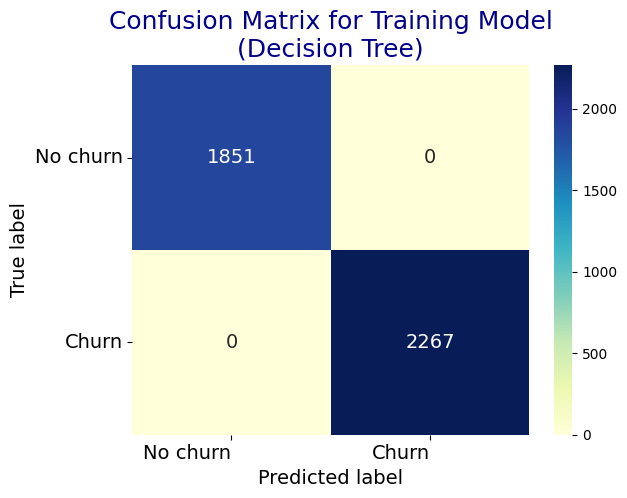

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(yr_train, y_train_dt)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Decision Tree)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()
     

In [ ]:
model_df_smote.fit(xr_train,yr_train)
y_predict_dt = model_df_smote.predict(xr_test)
model_score_r = model_df_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, y_predict_dt))

0.928652321630804
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       789
           1       0.93      0.94      0.94       977

    accuracy                           0.93      1766
   macro avg       0.93      0.93      0.93      1766
weighted avg       0.93      0.93      0.93      1766



In [ ]:
print(metrics.confusion_matrix(yr_test, y_predict_dt))

[[717  72]
 [ 54 923]]


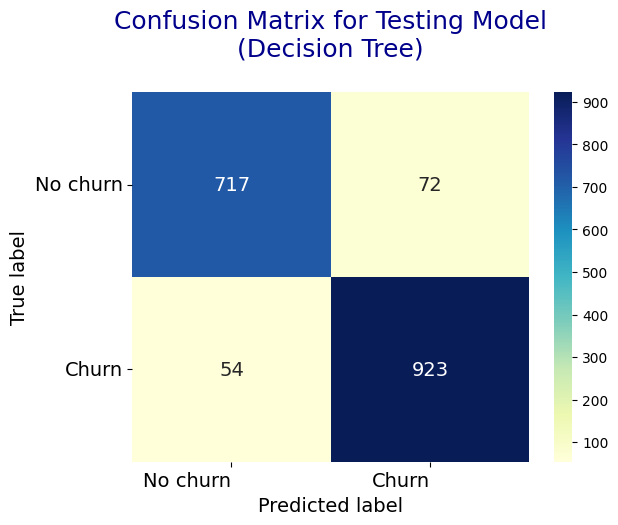

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(yr_test, y_predict_dt)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree)\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier=RandomForestClassifier()

In [ ]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100)

In [ ]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=100)

In [ ]:
y_pred=model_rf.predict(x_test)

In [ ]:
model_rf.score(x_test,y_test)

0.7867298578199052

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1555
           1       0.62      0.48      0.54       555

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110



Menangani imbalanced data

In [ ]:
sm = SMOTEENN(random_state = 2)
X_resampled1, y_resampled1 = sm.fit_resample(X,y)

In [ ]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.3)

In [ ]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100)

In [ ]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(random_state=100)

In [ ]:
from sklearn.metrics import classification_report
y_train1_pred = model_rf.predict(xr_train1)
print('Classification Report Training Model (Random Forest) :')
print(classification_report(yr_train1, y_train1_pred))

Classification Report Training Model (Random Forest) :
              precision    recall  f1-score   support

           0       0.78      0.99      0.88      1844
           1       0.99      0.78      0.87      2274

    accuracy                           0.87      4118
   macro avg       0.89      0.89      0.87      4118
weighted avg       0.90      0.87      0.87      4118



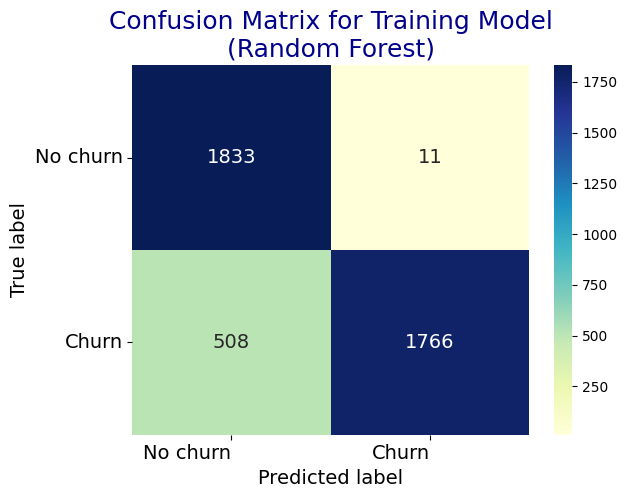

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df1 = pd.DataFrame((confusion_matrix(yr_train1, y_train1_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df1, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()
     

In [ ]:
y_predict_rf = model_rf_smote.predict(xr_test1)

In [ ]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [ ]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, y_predict_rf))

0.9597961494903737
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       796
           1       0.96      0.97      0.96       970

    accuracy                           0.96      1766
   macro avg       0.96      0.96      0.96      1766
weighted avg       0.96      0.96      0.96      1766



In [ ]:
print(metrics.confusion_matrix(yr_test1, y_predict_rf))

[[753  43]
 [ 28 942]]


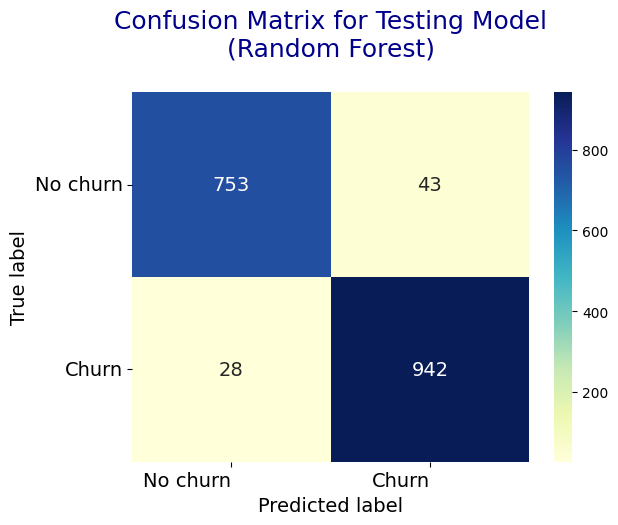

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(yr_test1, y_predict_rf)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression().fit(x_train, y_train)

   

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1376  179]
 [ 253  302]]


In [ ]:
#Imbalanced data

sm = SMOTEENN(random_state = 2)
X_resampled2, y_resampled2 = sm.fit_resample(X,y)

In [ ]:
xr_train3,xr_test3,yr_train3,yr_test3=train_test_split(X_resampled2, y_resampled2,test_size=0.3)

In [ ]:
from sklearn.metrics import classification_report
# Predict
y_train2_pred = log_model.predict(xr_train3)
# Print classification report
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(yr_train3, y_train2_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.73      0.98      0.84      1857
           1       0.98      0.70      0.81      2261

    accuracy                           0.83      4118
   macro avg       0.85      0.84      0.83      4118
weighted avg       0.87      0.83      0.82      4118



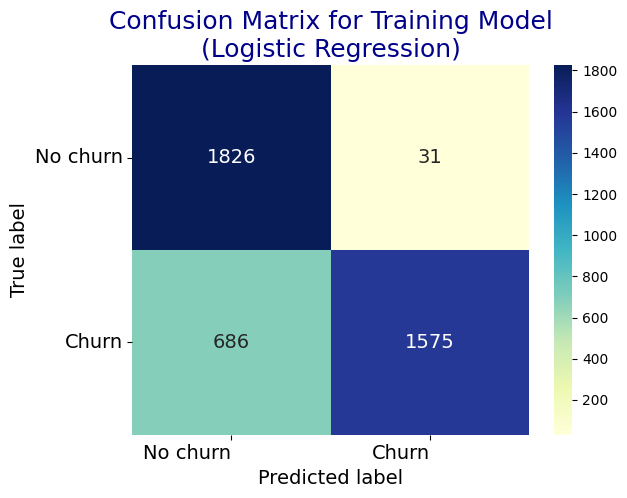

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df2 = pd.DataFrame((confusion_matrix(yr_train3, y_train2_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df2, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
y_pred_log = logreg.predict(xr_test3)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(xr_test3, yr_test3)))

Accuracy of logistic regression classifier on test set: 0.83


In [ ]:
print(classification_report(yr_test3,y_pred_log))

              precision    recall  f1-score   support

           0       0.73      0.98      0.83       783
           1       0.98      0.70      0.82       983

    accuracy                           0.83      1766
   macro avg       0.85      0.84      0.83      1766
weighted avg       0.87      0.83      0.83      1766



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yr_test3, y_pred_log)
print(confusion_matrix)

[[767  16]
 [290 693]]


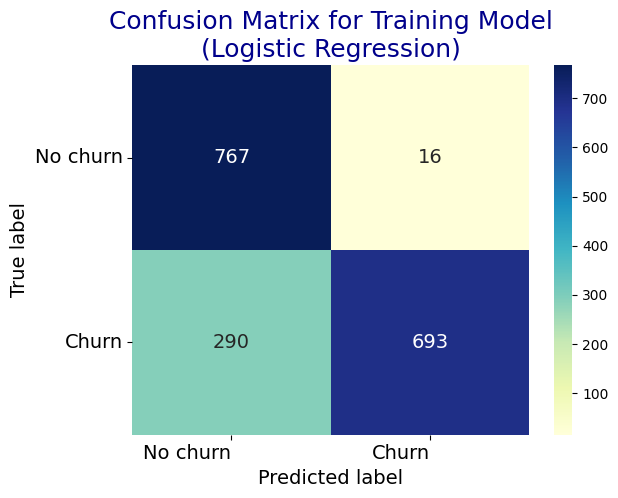

In [ ]:

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(yr_test3, y_pred_log)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

K-Neighbors Classifier

In [ ]:
#Imbalanced data

sm = SMOTEENN(random_state = 2)
X_resampled3, y_resampled3 = sm.fit_resample(X,y)

In [ ]:
xr_train4,xr_test4,yr_train4,yr_test4=train_test_split(X_resampled3, y_resampled3,test_size=0.3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(xr_train4, yr_train4)
y_train3_pred = knn_classifier.predict(xr_train4)
# Print classification report
print('Classification Report Training Model (KNN) :')
print(classification_report(yr_train4, y_train3_pred))

Classification Report Training Model (KNN) :
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1871
           1       0.97      0.99      0.98      2247

    accuracy                           0.97      4118
   macro avg       0.97      0.97      0.97      4118
weighted avg       0.97      0.97      0.97      4118



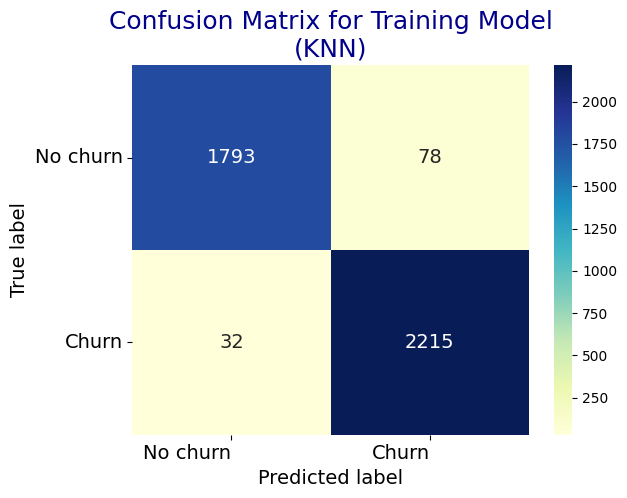

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df3 = pd.DataFrame((confusion_matrix(yr_train4, y_train3_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df3, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(KNN)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(xr_train4, yr_train4)
y_pred_knn = knn_classifier.predict(xr_test4)

In [ ]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_true = yr_test4
print(confusion_matrix(y_true, y_pred_knn))

accuracy =knn_classifier.score(xr_test4,yr_test4)
print('Accuracy of KNN Model classifier on test set: {:.2f}'.format(knn_classifier.score(xr_test4,yr_test4)))

[[707  62]
 [ 34 963]]
Accuracy of KNN Model classifier on test set: 0.95


In [ ]:
print(classification_report(yr_test4,y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       769
           1       0.94      0.97      0.95       997

    accuracy                           0.95      1766
   macro avg       0.95      0.94      0.94      1766
weighted avg       0.95      0.95      0.95      1766



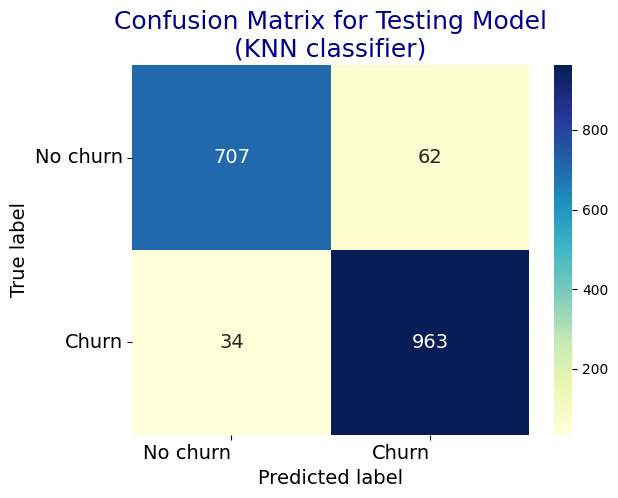

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(yr_test4, y_pred_knn)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(KNN classifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Support Vector Machine

In [ ]:
sm = SMOTEENN(random_state = 2)
X_resampled5, y_resampled5 = sm.fit_resample(X,y)

In [ ]:
xr_train6,xr_test6,yr_train6,yr_test6=train_test_split(X_resampled5, y_resampled5,test_size=0.3)

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC()
svclassifier.fit(xr_train6, yr_train6)  
y_train5_pred=svclassifier.predict(xr_train6)
# Print classification report
print('Classification Report Training Model (SVM) :')
print(classification_report(yr_train6, y_train5_pred))

Classification Report Training Model (SVM) :
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1878
           1       0.81      0.80      0.80      2240

    accuracy                           0.79      4118
   macro avg       0.79      0.79      0.79      4118
weighted avg       0.79      0.79      0.79      4118



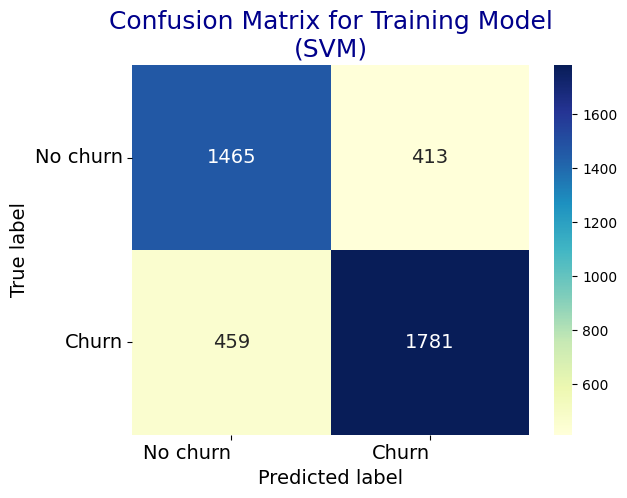

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df5 = pd.DataFrame((confusion_matrix(yr_train6, y_train5_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df5, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(SVM)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()
     

In [ ]:
y_pred_svm=svclassifier.predict(xr_test6)
accuray=svclassifier.score(xr_test6,yr_test6 )
print("SVM Classifier:", accuracy_score(yr_test6,y_pred_svm))

SVM Classifier: 0.7950169875424689


In [ ]:
print(classification_report(yr_test6,y_pred_svm))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       762
           1       0.85      0.78      0.81      1004

    accuracy                           0.80      1766
   macro avg       0.79      0.80      0.79      1766
weighted avg       0.80      0.80      0.80      1766



In [ ]:
y_true=yr_test6
print(confusion_matrix(y_true, y_pred_svm))

[[620 142]
 [220 784]]


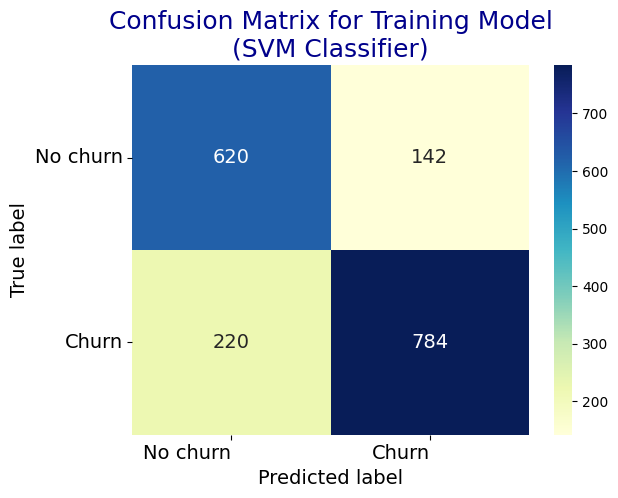

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(yr_test6, y_pred_svm)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(SVM Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

**Conclusion**

Dari analisa diatas dapat disimpulkan untuk memprediksi churn dari pelanggan telco dengan menggunakan dataset ini model terbaiknya menggunakan algortima KNN. Hal ini dikarenakan performa dari model KNN pada fase training dan testing memiliki akurasi yang sama-sama baik yaitu 97 % (fase training) dan 95% (fase testing), sedangkan algoritma yang lain seperti decision tree cenderung over-Fitting performanya, algoritma random forest cenderung under-Fitting , dan algoritma lainnya memiliki akurasi yang lebih rendah dari KNN.


